Opinion Ai is just Opinion Mining .Technique used in NLP(Natural Language Processing) to determine the emotional undertone of a document.
Types->
1.Fine Grained Analysis
2.Intent Based Analysis
3.Emotion Detection
4.Aspect Based Analysis

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# just the advanced version of matplotlib
plt.style.use('ggplot')
import nltk


In [11]:
# Let's Read Our Data
df=pd.read_csv('./amazon.csv')


In [12]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [13]:
column_to_delete=['score_pos_neg_diff','score_average_rating','wilson_lower_bound']
df=df.drop(columns=column_to_delete)

In [14]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0


In [15]:
df.to_csv('./amazon.csv', index=False)

In [16]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0


In [17]:
df['reviewText'].values[0]
#Opinion Analysis will be done on this row

'No issues.'

In [18]:
print(df.shape)

(4915, 9)


EDA(Exploratory Data Analysis)

In [19]:
df['overall'].value_counts().sort_index()
#this is we are sorting and counting the number of times the cutomer gave us the score from 1 to 5

1     244
2      80
3     142
4     527
5    3922
Name: overall, dtype: int64

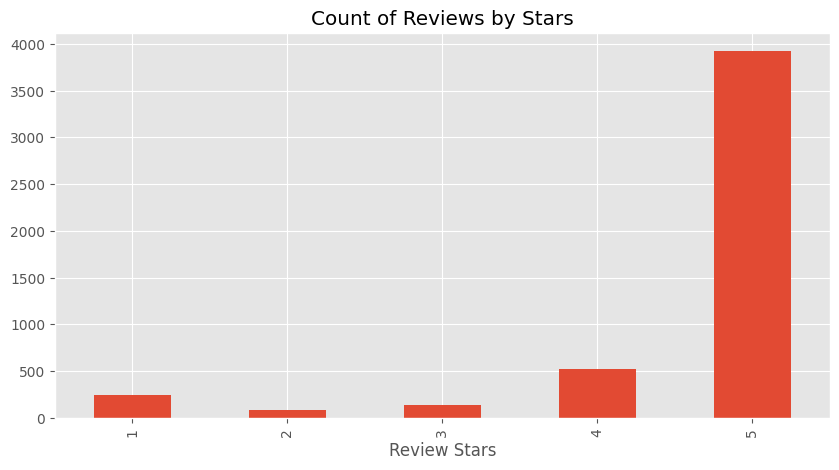

In [20]:
ax=df['overall'].value_counts().sort_index() \
    .plot(kind='bar',
            title='Count of Reviews by Stars',
            figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()
# \ it is a line continuation character in python
# the difference between xlabel and set_xlabel is that xlabel is used to define x label while plotting the graph and set_xlabel is used to specify xaxis for a specific axes object


Basic NLTK(Natural Language Toolkit)

In [21]:
example = df['reviewText'][50]
print(example)


A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


In [28]:
token=nltk.word_tokenize(example)
token[:10]
# spilts each word using tokanization
#So the 1st thing nltk does is Tokenization


['A', 'memory', 'card', 'either', 'works', 'or', 'it', 'does', "n't", '.']

In [34]:
tagged=nltk.pos_tag(token)
tagged[:10]
#each tokenized letter is given it's own part of speech such as NN means that it is a noun

[('A', 'DT'),
 ('memory', 'NN'),
 ('card', 'NN'),
 ('either', 'CC'),
 ('works', 'VBZ'),
 ('or', 'CC'),
 ('it', 'PRP'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('.', '.')]

In [40]:
entity=nltk.chunk.ne_chunk(tagged)
entity.pprint()
#named entity extraction from the text here such as location and organization that it becomes easier to identify

(S
  A/DT
  memory/NN
  card/NN
  either/CC
  works/VBZ
  or/CC
  it/PRP
  does/VBZ
  n't/RB
  ./.
  This/DT
  was/VBD
  always/RB
  going/VBG
  to/TO
  be/VB
  a/DT
  one/CD
  star/NN
  or/CC
  five/CD
  star/NN
  review/NN
  -/:
  no/DT
  middle/JJ
  ground.The/NN
  adapter/NN
  is/VBZ
  a/DT
  nice/JJ
  bonus/NN
  too/RB
  ,/,
  though/IN
  I/PRP
  do/VBP
  n't/RB
  think/VB
  I/PRP
  have/VBP
  anything/NN
  to/TO
  use/VB
  it/PRP
  with/IN
  ./.)


VADER(Valence Aware Dictionary and Sentiment Analysis)
It has bag of values such as Positive, Negative and Neutral and it identifies the text according to that so it wil tell how positive how much negative how neutral that statement is actually
But the drwback is it doesn't account  of relationship between words which is important in human speech

In [61]:
from nltk.sentiment import SentimentIntensityAnalyzer # pretrained sentiment analysis class
from tqdm.notebook import tqdm #progress bar tracker

sia=SentimentIntensityAnalyzer()

In [45]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [46]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [47]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [62]:
#Run the Polarity Score on the Entire DataSet
for i, row in tqdm(df.iterrows()):
    text=row['reviewText']
    myid=row['Unnamed:0']
    break

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html